<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Estefania Del Pilar Aracena Vallejos  <br>
Fecha: 26/05/2023

# Importación de librerias necesarias

# Parte II. Clasificación

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier, KerasRegressor
print(tf.__version__)

2.12.0


## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [2]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/EstefaniaAracena/MasterUnir/main/yeast%20(2).csv'
data=pd.read_csv(url)
data.head(5)


,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.51,0.40,0.56,0.17,0.5,0.0,0.49,0.22,CYT
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,CYT
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,CYT


## Descripción de la fuente del Dataset

El data set se obtuvo de "Kaggle" y tiene por nombre: "yeast.csv". 

Link: https://www.kaggle.com/datasets/samanemami/yeastcsv

Kaggle es una plataforma en donde podemos encontrar bases de datos (públicos) para análisis y aprendizaje automático. 

El dataset se descargó en formao .csv y luego se publicó en un repositorio propio (https://github.com/EstefaniaAracena/MasterUnir/blob/main/yeast%20(2).csv) para hacer la carga de datos a este notebook de forma rápida y sencilla).

## Explique el problema a resolver. 

Los modelos que se presentarán a continuación tienen como objetivo predecir en que lugar de la célula se encuentra una determinada proteína. La columna "name" corresponde al nombre de la secuencia de la proteína que se quiere predecir a partir de los distintos valores de señales obtenidos por distintas técnicas de secuenciación y análisis proteico. 

Para esto se comparán 3 modelos y se espera concluir cual entrega la mejor predicción. Los modelos serán: 
- modelo 1: construcción de una red neuronal (NR)
- modelo 2: random forest (RF)
- modelo 3: clasificación con máquina de vectores lineal (SVC - lineal )

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [3]:
print('Número de instancias en total:')
print(data.shape) #entrega número de columnas y de filas
print("El dataset cuenta con 1394 filas y 9 columnas de atributos, en donde la coumna 'name' corresponde a la variable objetivo.")

Número de instancias en total:
(1394, 9)
El dataset cuenta con 1394 filas y 9 columnas de atributos, en donde la coumna 'name' corresponde a la variable objetivo.


In [4]:
print('Número de atributos de entrada, su significado y tipo:')
print(data.info()) #entrega un resumen de la tabla, cuantas instancias y de que tipo
print("Las variables mcg, gvh, alm, mit, erl, pox, vac, nuc son de tipo numérico y name de tipo categórico, no hay celdas vacías")

Número de atributos de entrada, su significado y tipo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1394 non-null   float64
 1   gvh     1394 non-null   float64
 2   alm     1394 non-null   float64
 3   mit     1394 non-null   float64
 4   erl     1394 non-null   float64
 5   pox     1394 non-null   float64
 6   vac     1394 non-null   float64
 7   nuc     1394 non-null   float64
 8   name    1394 non-null   object 
dtypes: float64(8), object(1)
memory usage: 98.1+ KB
None
Las variables mcg, gvh, alm, mit, erl, pox, vac, nuc son de tipo numérico y name de tipo categórico, no hay celdas vacías


In [5]:
#Código que responde a la descripción anterior
print('Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman:')
print(data.groupby('name').size()) #entrega la frecuencia de cada clase
print("La clase tiene 6 categorias: CYT, ME1, ME2, ME3, MIT, NUC.") 

Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman:
name
CYT    463
ME1     44
ME2     51
ME3    163
MIT    244
NUC    429
dtype: int64
La clase tiene 6 categorias: CYT, ME1, ME2, ME3, MIT, NUC.


In [6]:
print('Número de instancias pertenecientes a cada clase:')
data.describe() #entrega un resumen de la tabla, cuantas instancias por cada clase y frecuencia más alta

Número de instancias pertenecientes a cada clase:


,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,0.491844,0.492834,0.500940,0.261636,0.502367,0.001549,0.500244,0.278709
std,0.131456,0.118113,0.087512,0.139272,0.033057,0.034149,0.057374,0.108925
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.400000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.480000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.560000,0.560000,0.320000,0.500000,0.000000,0.530000,0.310000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [7]:
print('Estadisticas de la variable objetivo:')
data['name'].describe()

Estadisticas de la variable objetivo:


count     1394
unique       6
top        CYT
freq       463
Name: name, dtype: object

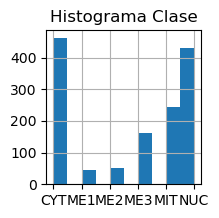

In [8]:
plt.figure(figsize=(2,2))
data['name'].hist().set_title("Histograma Clase")
plt.savefig('hist-clase.png')
plt.show()

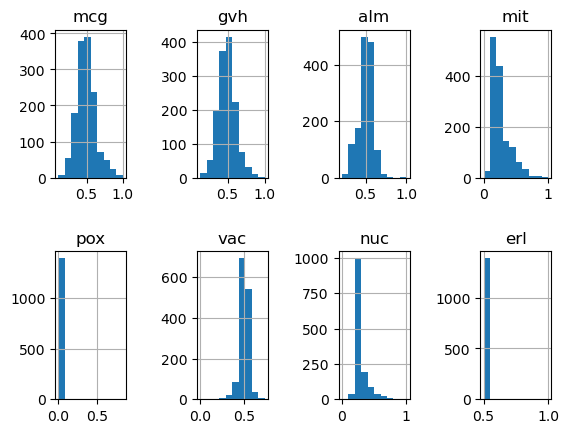

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4)
plt.subplots_adjust(wspace=1, hspace=0.5)
data['mcg'].hist(ax=axes[0,0]).set_title("mcg")
data['gvh'].hist(ax=axes[0,1]).set_title("gvh")
data['alm'].hist(ax=axes[0,2]).set_title("alm")
data['mit'].hist(ax=axes[0,3]).set_title("mit")
data['erl'].hist(ax=axes[1,3]).set_title("erl")
data['pox'].hist(ax=axes[1,0]).set_title("pox")
data['vac'].hist(ax=axes[1,1]).set_title("vac")
data['nuc'].hist(ax=axes[1,2]).set_title("nuc")
plt.savefig('hist-atributos.png')
plt.show()

In [10]:
data.shape

(1394, 9)

Para este set de datos, se reconocen 9 atributos, 8 de ellos serán utilizados como entradas ('mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc') y 1 atributo es el objetivo (name). Cada atributo cuenta con 1394 instancias.
    
Los atributos de entrada son de tipo numérico y la clase es de tipo categórico, con 6 categorías: CYT, ME1, ME2, ME3, MIT, NUC.  No hay celdas vacías, sin embargo la clase es poco balanceada, como se observa en el histograma para la clase. 

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [11]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
data_encoder=pd.get_dummies(data)

## División del dataset en datos de entrenamiento y datos de test 

In [12]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
X = data_encoder[data_encoder.columns[:-6]] #atributos
y=data['name'] #clase categórica 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True) #división set de datos 
y_train_encoded=pd.get_dummies(y_train) #transformación de clase datos de entrenamiento
y_test_encoded=pd.get_dummies(y_test) #transformación de clase datos de prueba
n=y_train_encoded.shape[1] #número de categorías de la clase 

## Propuesta de arquitectura de red neuronal

+ las neuronas en la capa de entrada: la capa de entrada tendrá 110 neuronas
+ las capas intermedias: hay 3 capas intermedias, una capa con 110 neuronas y 2 capas con 55 neuronas. También se utilizan capas "dropout" para estabilizar y asegurar la convergencia del modelo, estas se ubican luego de cada capa de 128 neuronas. 
+ capa de salida: la capa de salida tiene 6 neuronas ya que tenemos 6 categorias en la clase
+ funciones de activación: para la capa de entrada y primera capa escondida se utiliza la función de activación "relu", para las siguientes dos capas escondidas se utiliza "elu" y para la capa de salida "softmax"
+ además, se utilizan una función para la activación del kernel que ayuda a que el entrenamiento se realice en menos tiempo: kernel_initializer="he_uniform para las capas de entrada y escondidas y kernel_initializer="glorot_uniform" para la capa de salida"

#### Se definieron estos parámetros luego de múltiples pruebas

In [13]:
# Código de la estructuración de la red
modelo1 = keras.Sequential([
    layers.Dense(110, activation='relu', use_bias=True, kernel_initializer="he_normal", input_shape=[x_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(110, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    layers.Dropout(0.3),
    layers.Dense(55, activation='elu', use_bias=True, kernel_initializer="he_normal"),
    layers.Dense(55, activation='elu', use_bias=True, kernel_initializer="he_normal"),
    layers.Dense(6, activation='softmax', kernel_initializer="glorot_uniform")])

modelo1.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', 'AUC', 'Precision'] )

In [14]:
#Código de la inspección del modelo de red
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 110)               990       
                                                                 
 dropout (Dropout)           (None, 110)               0         
                                                                 
 dense_1 (Dense)             (None, 110)               12210     
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                                 
 dense_2 (Dense)             (None, 55)                6105      
                                                                 
 dense_3 (Dense)             (None, 55)                3080      
                                                                 
 dense_4 (Dense)             (None, 6)                 3

##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [15]:
#Código de ajuste y entrenamiento
#Código de ajuste y entrenamiento
tf.data.experimental.enable_debug_mode()
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000
history = modelo1.fit(x_train, y_train_encoded, epochs=EPOCHS, validation_data=(x_test, y_test_encoded), verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [16]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
modelo1_evaluacion_train=modelo1.evaluate(x_train, y_train_encoded)[1]
precision_evaluacion_train=modelo1.evaluate(x_train, y_train_encoded)[3] #precision datos prueba

31/31 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8687 - auc: 0.9895 - precision: 0.8885


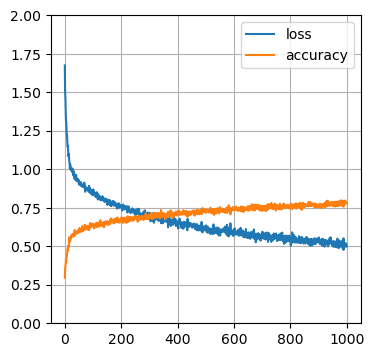

In [17]:
resumen1=pd.DataFrame(history.history)
plt.figure(figsize=[4,4])
plt.plot(resumen1['loss'], label='loss')
plt.plot(resumen1['accuracy'], label='accuracy')
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.legend()
plt.show()

#### 1500 épocas se utlizaron para el entrenamiento del modelo, un número a menor a 1500 no asegura convergencia. 

### Evalúe los resultados  para el conjunto de test.

In [18]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)
modelo1_evaluacion_test=modelo1.evaluate(x_test, y_test_encoded)[1] #exactitud datos test
precision_evaluacion_test=modelo1.evaluate(x_test, y_test_encoded)[3] #precision datos test

14/14 [==============================] - 0s 4ms/step - loss: 1.5687 - accuracy: 0.6205 - auc: 0.8880 - precision: 0.6513


In [19]:
#Código para mostrar la evaluación de los modelos para el conjunto de prueba
#modelo 1
predicciones=modelo1.predict(x_test) 
predicciones=np.argmax(predicciones, axis=1)
reales=np.argmax(y_test_encoded.values, axis=1)
matriz1 = confusion_matrix(reales, predicciones) #matriz de confusión datos test

M1=modelo1.predict(x_test)
suma1=0 #calculo de instancias clasificadas correctamente
for i in range(n):
    suma1 += matriz1[i,i]

#cálculo de FP rate, TP rate, curva ROC y área bajo la curva
fpr1, tpr1, roc_auc1 = dict(), dict(), dict()
for i in range(n):
    fpr1[i], tpr1[i], threshold = roc_curve(y_test_encoded.values[:, i], M1[:, i])
    #roc_auc2[i] = auc(fpr2[i], tpr1[i])

tprM1=np.zeros(n)
for i in range(n):     
     tprM1[i]=tpr1[i][1].round(3)
print("TP Rate Modelo 1: ", tprM1)    

fprM1=np.zeros(n)
for i in range(n):     
     fprM1[i]=fpr1[i][1].round(3)
print("FP Rate Modelo 1: ", fprM1)

print("Matriz de confusión modelo 1: ")
print(matriz1)

fpr1['micro'], tpr1['micro'], _ = roc_curve(y_test_encoded.values.ravel(), M1.ravel())
roc_auc1['micro'] = auc(fpr1['micro'], tpr1['micro'])

14/14 [==============================] - 0s 3ms/step
TP Rate Modelo 1:  [0.007 0.071 0.    0.019 0.014 0.008]
FP Rate Modelo 1:  [0.004 0.    0.002 0.    0.    0.   ]
Matriz de confusión modelo 1: 
[[83  0  1  2 14 42]
 [ 0 10  2  1  1  0]
 [ 3  1  7  3  1  2]
 [ 2  0  1 44  0  5]
 [19  1  1  5 38  7]
 [35  0  1  1  8 78]]


## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

In [20]:
#Código de ajuste del modelo 1
modelo2=RandomForestClassifier(n_estimators=250, max_depth=9) #random forest con 250 árboles y un máximo de 9 nodos 
modelo2.fit(x_train, y_train) #entrenamiento del modelo 
modelo2_predicciones_train = modelo2.predict(x_train) #predicciones set de entrenamiento
modelo2_predicciones_test = modelo2.predict(x_test) #predicciones set de prueba

In [21]:
#Código de ajuste del modelo 2
modelo3=SVC(kernel = 'poly', C = 4, degree=3, tol=1e-4, random_state = 1) #SVC polinómico de grado 3
modelo3.fit(x_train, y_train) #entrenamiento del modelo 
modelo3_predicciones_train = modelo3.predict(x_train) #predicciones set de entrenamiento
modelo3_predicciones_test = modelo3.predict(x_test) #predicciones set de prueba

In [22]:
#Código para mostrar la evaluación de los modelos
#modelo 2
Precision21= modelo2.score(x_train, y_train).round(5)*100 #calcula la precisión de los datos de entrenamiento 
Precision22= modelo2.score(x_test, y_test).round(5)*100 #calcula la precisión de los datos de prueba 
exactitud21=accuracy_score(y_train,modelo2_predicciones_train).round(5)*100
exactitud22=accuracy_score(y_test,modelo2_predicciones_test).round(5)*100
print("Precision set de entrenamiento (%): ", Precision21)
print("Precision set de entrenamiento (%): ", Precision22)
print("Exactitud -train (%): ", exactitud21)
print("Exactitud -test (%): ", exactitud22)
cros_val2=cross_val_score(modelo2, x_test, y_test) #validación cruzada para modelo 2
print("Validación cruzada modelo 2: ", cros_val2)
matriz2=confusion_matrix(y_test, modelo2_predicciones_test) #matriz de confusión datos test

M2=pd.get_dummies(modelo2_predicciones_test).values #transformación predicciones modelo 1
suma2=0 #calculo de instancias clasificadas correctamente
for i in range(n):
    suma2 += matriz2[i,i]

#cálculo de FP rate, TP rate, curva ROC y área bajo la curva
fpr2, tpr2, roc_auc2 = dict(), dict(), dict()
for i in range(n):
    fpr2[i], tpr2[i], threshold = roc_curve(y_test_encoded.values[:, i], M2[:, i])
    #roc_auc2[i] = auc(fpr2[i], tpr1[i])

tprM2=np.zeros(n)
for i in range(n):     
     tprM2[i]=tpr2[i][1].round(3)
print("TP Rate Modelo 2: ", tprM2)    

fprM2=np.zeros(n)
for i in range(n):     
     fprM2[i]=fpr2[i][1].round(3)
print("FP Rate Modelo 2: ", fprM2)

print("Matriz de confusión modelo 2: ")
print(matriz2)

fpr2['micro'], tpr2['micro'], _ = roc_curve(y_test_encoded.values.ravel(), M2.ravel())
roc_auc2['micro'] = auc(fpr2['micro'], tpr2['micro'])

Precision set de entrenamiento (%):  83.59
Precision set de entrenamiento (%):  63.961999999999996
Exactitud -train (%):  83.59
Exactitud -test (%):  63.961999999999996
Validación cruzada modelo 2:  [0.64285714 0.61904762 0.64285714 0.67857143 0.55421687]
TP Rate Modelo 2:  [0.634 0.929 0.412 0.885 0.606 0.561]
FP Rate Modelo 2:  [0.235 0.005 0.002 0.041 0.063 0.155]
Matriz de confusión modelo 2: 
[[90  0  0  4 12 36]
 [ 0 13  1  0  0  0]
 [ 2  1  7  4  1  2]
 [ 1  0  0 46  0  5]
 [19  1  0  5 43  3]
 [43  0  0  2  9 69]]


In [23]:
#Código para mostrar la evaluación de los modelos
#modelo 3
Precision31= modelo3.score(x_train, y_train).round(5)*100 #calcula la precisión de los datos de entrenamiento 
Precision32= modelo3.score(x_test, y_test).round(5)*100 #calcula la precisión de los datos de prueba
exactitud3=accuracy_score(y_test,modelo3_predicciones_test).round(5)*100
exactitud31=accuracy_score(y_train,modelo3_predicciones_train).round(5)*100
exactitud32=accuracy_score(y_test,modelo3_predicciones_test).round(5)*100
print("Precision set de entrenamiento (%): ", Precision31)
print("Precision set de entrenamiento (%): ", Precision32)
print("Exactitud -train (%): ", exactitud31)
print("Exactitud -test (%): ", exactitud32)
cros_val3=cross_val_score(modelo3, x_test, y_test) #validación cruzada para modelo 2
print("Validación cruzada modelo 3: ", cros_val3)
matriz3=confusion_matrix(y_test, modelo3_predicciones_test) #matriz de confusión datos test

M3=pd.get_dummies(modelo3_predicciones_test).values #transformación predicciones modelo 1
suma3=0 #calculo de instancias clasificadas correctamente
for i in range(n):
    suma3 += matriz3[i,i]

#cálculo de FP rate, TP rate, curva ROC y área bajo la curva
fpr3, tpr3, roc_auc3 = dict(), dict(), dict()
for i in range(n):
    fpr3[i], tpr3[i], threshold = roc_curve(y_test_encoded.values[:, i], M3[:, i])
    #roc_auc3[i] = auc(fpr2[i], tpr1[i])

tprM3=np.zeros(n)
for i in range(n):     
     tprM3[i]=tpr3[i][1].round(3)
print("TP Rate Modelo 2: ", tprM2)    

fprM3=np.zeros(n)
for i in range(n):     
     fprM3[i]=fpr3[i][1].round(3)
print("FP Rate Modelo 2: ", fprM3)

print("Matriz de confusión modelo 3: ")
print(matriz3)

fpr3['micro'], tpr3['micro'], _ = roc_curve(y_test_encoded.values.ravel(), M3.ravel())
roc_auc3['micro'] = auc(fpr3['micro'], tpr3['micro'])

Precision set de entrenamiento (%):  66.359
Precision set de entrenamiento (%):  64.2
Exactitud -train (%):  66.359
Exactitud -test (%):  64.2
Validación cruzada modelo 3:  [0.66666667 0.5952381  0.60714286 0.64285714 0.4939759 ]
TP Rate Modelo 2:  [0.634 0.929 0.412 0.885 0.606 0.561]
FP Rate Modelo 2:  [0.245 0.002 0.01  0.03  0.069 0.142]
Matriz de confusión modelo 3: 
[[90  0  1  2 14 35]
 [ 0 13  0  1  0  0]
 [ 3  0  9  3  1  1]
 [ 1  0  0 46  0  5]
 [19  1  2  3 45  1]
 [45  0  1  2  9 66]]


Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [27]:
#Código para mostrar la comparación de métricas de desempeño de las tres propuestas en tabla
tabla=[["Exactitud train (%)",modelo1_evaluacion_train*100, exactitud21, exactitud31],
       ["Exactitud test (%)",modelo1_evaluacion_test*100, exactitud22, exactitud32],
       ["Precisión prueba (%)", precision_evaluacion_train*100, Precision21, Precision31],
       ["Precisión test (%)", precision_evaluacion_test*100, Precision22, Precision32],
       ["Instancias predichas correctas", suma1, suma2, suma3]
      ]

columnas = ["Parámetro", "Red Neuronal", "Random Forest", "SVC-lineal"]
print(tabulate(tabla, headers=columnas, tablefmt="grid"))

+--------------------------------+----------------+-----------------+--------------+
| Parámetro                      |   Red Neuronal |   Random Forest |   SVC-lineal |
+================================+================+=================+==============+
| Exactitud train (%)            |        86.8718 |          83.59  |       66.359 |
+--------------------------------+----------------+-----------------+--------------+
| Exactitud test (%)             |        62.0525 |          63.962 |       64.2   |
+--------------------------------+----------------+-----------------+--------------+
| Precisión prueba (%)           |        88.8532 |          83.59  |       66.359 |
+--------------------------------+----------------+-----------------+--------------+
| Precisión test (%)             |        65.1282 |          63.962 |       64.2   |
+--------------------------------+----------------+-----------------+--------------+
| Instancias predichas correctas |       260      |         268  

Construya un párrafo con los principales hallazgos.

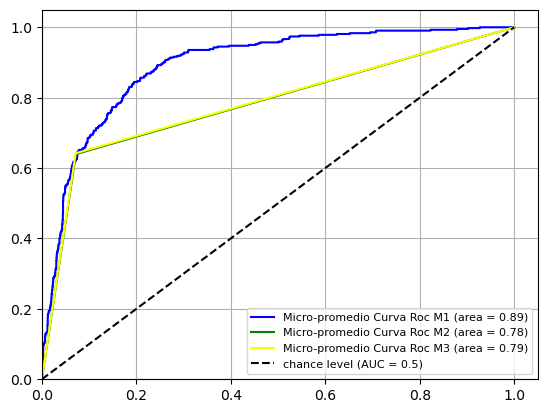

In [25]:
#Código para mostrar la comparación de métricas de desempeño de las tres propuestas en gráfica
plt.figure()
plt.plot(fpr1['micro'], tpr1['micro'], label='Micro-promedio Curva Roc M1 (area = {0:0.2f})' .format(roc_auc1['micro']), color='blue')
plt.plot(fpr2['micro'], tpr2['micro'], label='Micro-promedio Curva Roc M2 (area = {0:0.2f})' .format(roc_auc2['micro']), color='green')
plt.plot(fpr3['micro'], tpr3['micro'], label='Micro-promedio Curva Roc M3 (area = {0:0.2f})' .format(roc_auc3['micro']), color='yellow')
plt.plot([0, 1], [0, 1], 'k--', label="chance level (AUC = 0.5)")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.legend(loc="lower right", fontsize=8)
plt.show()

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

3 modelos se realizaron y se calcularon distintas métricas para compararlos, la exactitud fue una de ellas. La exactitud de los datos de entrenamiento es de 86%, 83% y 66% para la red neuronal, random forest y SVC respectivamente, y para los datos de prueba es de 62%, 63% y 64%. De estos resultados podemos decir que el modelo que tuvo el rendimiento más bajo es la red neuronal. Si bien la exactitud de los datos de prueba para SVC es la menor, para los datos de prueba es la mejor. Esto podría deberse a un sobreajuste en la modelación, sin embargo, ese porcentaje de exactitud no da cabida a sobreajuste. 

En cuanto a la exactitud los resultados fueron de 88%, 83% y 66% para los datos de prueba y de 65%, 63% y 64% para los datos de prueba para la red neuronal, RF y SVC respectivamente. En esta métrica, la red neuronal es la que arroja mejores resultados, tanto en entrenamiento como en los valores predichos. 

Con respecto a la matriz de confusión, SVC es el que tiene más instancias predichas correctas, lo sigue RF y luego la red neuronal. 

Graficamente, vemos las curvas roc 'micro' promedio para cada modelo, en donde la red neuronal arrojó un buen resultado, acercandose más a 1, mientras que los otros dos modelos tienen resultados similares. 

Luego de analizar las métricas se concluye que el modelo que entrega las mejores predicciones es la red neuronal, sin embargo, podría ser mejor. 

Para mejorar los resultados es importante tener una clase balanceada, lo cual no tenemos en este dataset, por ese motivo se usaron estabilizadores como capas "dropout" y estabilizadores de kernel, para que el cálculo de los pesos fluyera de forma homogénea hacia adelante y atrás a través de la red neuronal, y de esta forma se lograron mejorar los datos predichos y no sobreajustar el modelo. 

In [26]:
#from ann_visualizer.visualize import ann_viz
#ann_viz(modelo1, title="Red Neuronal Artificial - Clasificación");